In [1]:
import sacc
import numpy as np
from matplotlib import pyplot as plt

In [10]:
ls '/users/boryanah/repos/xCell-likelihoods/simple_marginalization/data/'

cls_covG_lsst_derfrac0.01.fits*  cov_extra_derfrac0.20.npy*
cls_covG_lsst.fits*              cov_extra_derfrac0.50.npy*
cls_covG_lsst_G.fits*            cov_extra_derfrac1.00.npy*
cls_covG_new_derfrac0.01.fits*   lsst_cov_extra_derfrac0.01.npy*
cls_covG_new_derfrac0.05.fits*   lsst_cov_extra.npy*
cls_covG_new_derfrac0.10.fits*   lsst_cov_G.npy*
cls_covG_new_derfrac0.20.fits*   lsst_t_derfrac0.01.npy*
cls_covG_new_derfrac0.50.fits*   t_derfrac0.01.npy*
cls_covG_new_derfrac1.00.fits*   t_derfrac0.05.npy*
cls_covG_new.fits*               t_derfrac0.10.npy*
cov_extra_derfrac0.01.npy*       t_derfrac0.20.npy*
cov_extra_derfrac0.05.npy*       t_derfrac0.50.npy*
cov_extra_derfrac0.10.npy*       t_derfrac1.00.npy*


In [11]:
s = sacc.Sacc.load_fits('/users/boryanah/repos/xCell-likelihoods/simple_marginalization/data/cls_covG_lsst.fits')

In [13]:
trcomb = s.get_tracer_combinations()
print(trcomb)

[('DESgc__0', 'DESgc__0'), ('DESgc__1', 'DESgc__1'), ('DESgc__2', 'DESgc__2'), ('DESgc__3', 'DESgc__3'), ('DESgc__4', 'DESgc__4'), ('DESgc__0', 'DESwl__0'), ('DESgc__0', 'DESwl__1'), ('DESgc__0', 'DESwl__2'), ('DESgc__0', 'DESwl__3'), ('DESgc__1', 'DESwl__0'), ('DESgc__1', 'DESwl__1'), ('DESgc__1', 'DESwl__2'), ('DESgc__1', 'DESwl__3'), ('DESgc__2', 'DESwl__0'), ('DESgc__2', 'DESwl__1'), ('DESgc__2', 'DESwl__2'), ('DESgc__2', 'DESwl__3'), ('DESgc__3', 'DESwl__0'), ('DESgc__3', 'DESwl__1'), ('DESgc__3', 'DESwl__2'), ('DESgc__3', 'DESwl__3'), ('DESgc__4', 'DESwl__0'), ('DESgc__4', 'DESwl__1'), ('DESgc__4', 'DESwl__2'), ('DESgc__4', 'DESwl__3'), ('DESwl__0', 'DESwl__0'), ('DESwl__0', 'DESwl__1'), ('DESwl__0', 'DESwl__2'), ('DESwl__0', 'DESwl__3'), ('DESwl__1', 'DESwl__1'), ('DESwl__1', 'DESwl__2'), ('DESwl__1', 'DESwl__3'), ('DESwl__2', 'DESwl__2'), ('DESwl__2', 'DESwl__3'), ('DESwl__3', 'DESwl__3')]


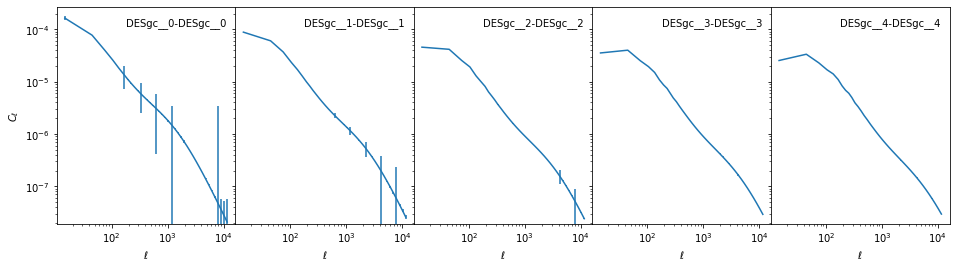

In [41]:
# gc-gc
f, ax = plt.subplots(1, 5, figsize=(16, 4), sharex=True, gridspec_kw={'wspace':0}, sharey=True)
for i in range(5):
    tr1 = tr2 = f'DESgc__{i}'
    ell, cl, cov = s.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))
    ax[i].set_xlabel('$\ell$')
    ax[i].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
     verticalalignment='top', transform=ax[i].transAxes)
ax[0].set_ylabel('$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.show()
plt.close()

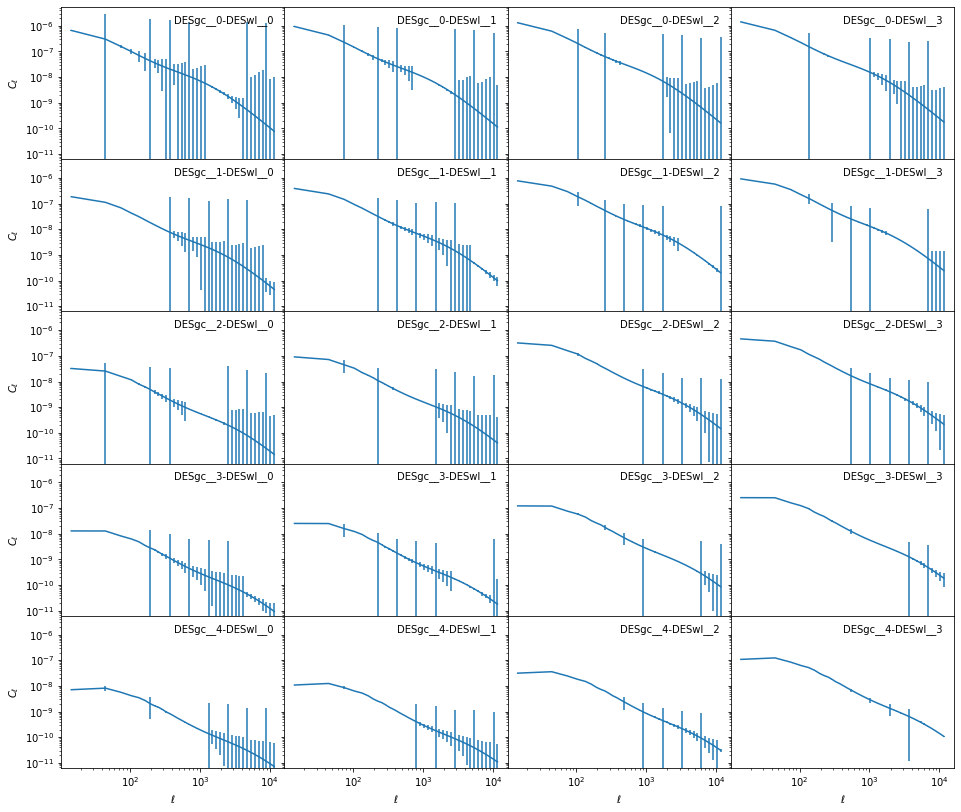

In [47]:
# gc-wl
f, ax = plt.subplots(5, 4, figsize=(16, 14), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i in range(5):
    tr1 = f'DESgc__{i}'
    for j in range(4):
        tr2 = f'DESwl__{j}'
        ell, cl, cov = s.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))
        ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
         verticalalignment='top', transform=ax[i, j].transAxes)
        ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')
plt.show()
plt.close()

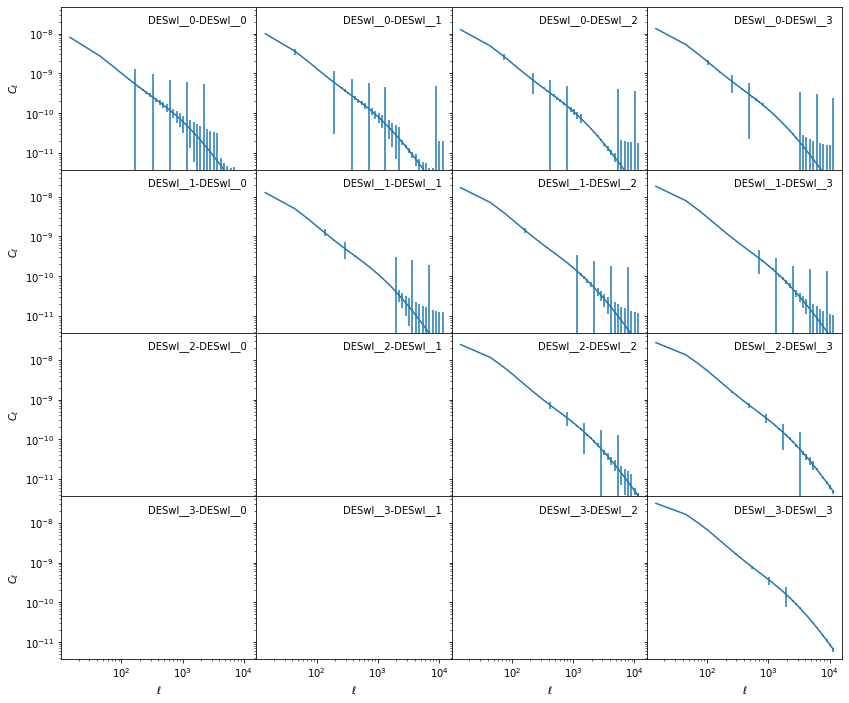

In [48]:
# wl-wl
f, ax = plt.subplots(4, 4, figsize=(14, 12), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i in range(4):
    tr1 = f'DESwl__{i}'
    for j in range(4):
        tr2 = f'DESwl__{j}'
        ell, cl, cov = s.get_ell_cl('cl_ee', tr1, tr2, return_cov=True)
        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))
        ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
         verticalalignment='top', transform=ax[i, j].transAxes)
        ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')

plt.show()
plt.close()